# Discuss on the US flights' delay and cancel from several aspect

## Investigation Overview
Take a plane is the fatest way when you want to go on vacation or go on a business trip to another State of the US. However, things won't always work out well. You likely encounter delay even cancellation of flight. Consequently, I want to discuss about the delay and cancellation of flights.  

### I list the key points that I will discuss in the following
- What is **the main reason** of flights' delay and cancellation ?
- How do **carriers** perform on delay and cancellation of flights ?
- Does delay or cancellation relate to **time** ?
- Which **destinations** have more delay or cancellation ? And which have longer **delay time** ?

## Dataset Overview
The data is about flights in the United States, from 2004 to 2008. It consists 35,796,231 data and 14 features, including 7 numeric features and 7 categorical features.  
Feature status in data is defined by myself. I separate flights into three status: normal, delay, and cancel.  
I will focus on the status delay and cancel.

In [1]:
# import packages that need in the exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline
pd.set_option('display.max_columns', 30)
pd.set_option('float_format', '{:f}'.format)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
flight = pd.read_csv('./flight.csv')

## Distribution of Flight Status
The majority of status is Normal, which occupy 76.2% of flights. **21.9%** of flights are delayed, and **1.9%** of flights are cancelled.

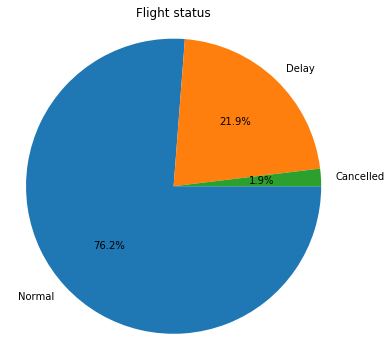

In [3]:
# Look at the count of status by bar chart, and look at the proportion of status by pie chart.
status_count = flight.groupby(['arrival_status']).size().sort_values(ascending = False)
color_base = sb.color_palette()[0]

plt.figure(figsize = (9,6))
plt.pie(status_count, labels = status_count.index, startangle = 0, counterclock = False, autopct='%1.1f%%')
plt.axis('square')
plt.title('Flight status');

plt.show()

## Overview of Delayed flights
Let's look at delayed flights first. If the delay time within 15 minutes, it is acceptable to most of people. However, if the delay time is longer than 15 minutes or more, it need to be on debate.

### Distribution of Delay Time
Only look at positive delay time. It is range from 0 to 2598 minutes. Plotted on a logarithmic scale, most of delay time is within 10 to 100 minutes.

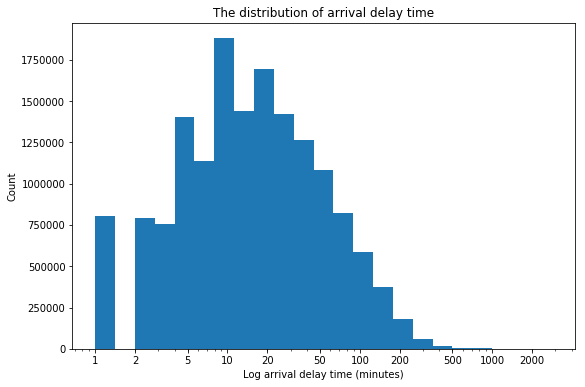

In [4]:
# Arrival delay time
plt.figure(figsize = (9, 6))
bin_edges = 10 ** np.arange(0, np.log10(flight.arrdelay_time.max()) + .15, .15)
plt.hist(data = flight.query('arrdelay_time >= 0'), x = 'arrdelay_time', bins = bin_edges)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000])
plt.title('The distribution of arrival delay time')
plt.xlabel('Log arrival delay time (minutes)')
plt.ylabel('Count');

In [6]:
delay_df = flight.query('arrival_status == "Delay"')

### Delay Time vs. Month and Year
The trend of monthly mean delay time is similar from year to year. In Summer and Winter have longer delay time, especially in June, July, and December. Longer delay may let you wait for about 60 minutes, while shorter delay time is about 50 minutes.

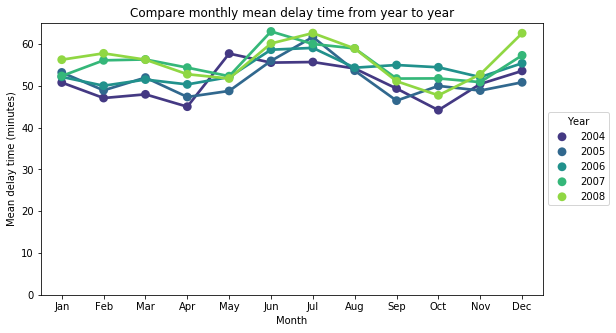

In [7]:
plt.figure(figsize = (9, 5))
sb.pointplot(data = delay_df, x = 'month', y = 'arrdelay_time', hue = 'year', ci = None, palette = "viridis")
plt.ylim(0, 65)
locs, labels = plt.xticks()
x_tick = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(locs, x_tick)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Year')
plt.title('Compare monthly mean delay time from year to year')
plt.xlabel('Month')
plt.ylabel('Mean delay time (minutes)');

### What cause delay of flights?
There are five reason for delay in dataset, including carrier, NAS, security, weather, and late aircraft. The definition of each reason refers from [here](https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations).
 - **Carrier delay**: The cause of delay was due to circumstances within the airline's control.
 - **National Aviation System(NAS) delay**: Delays attributable to the national aviation system that refer to a broad set of conditions.
 - **Security delay**: Delays caused by evacuation of a terminal or concourse, reboarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
 - **Weather delay**: Significant meteorological conditions that delays or prevents the operation of a flight.
 - **Late aircraft delay**: A previous flight with same aircraft arrived late, causing the present flight to depart late.  
 
The main reason that have higher relation with delay time are **late aircraft**, **NAS**, and **carrier**. Hence, if the previous flight delay, there are higher probability your flight will delay.

In [8]:
reason_delaytime = flight.query('arrival_status == "Delay"')[['carrier_delay', 'nas_delay', 'late_aircraft_delay', 'security_delay', 'weather_delay']].sum(axis = 0).sort_values(ascending = False).reset_index()
reason_delaytime.columns = ['delay_reason', 'total_time']

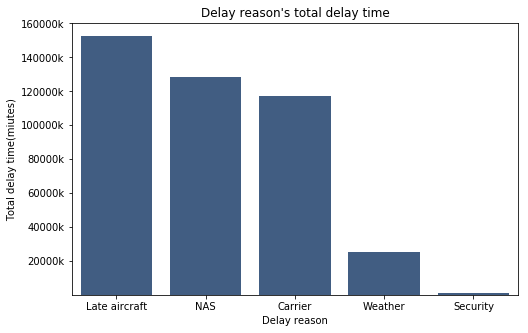

In [9]:
color_base = sb.color_palette('viridis')[1]
plt.figure(figsize = (8, 5))
sb.barplot(data = reason_delaytime, x = 'delay_reason', y = 'total_time', color = color_base)
plt.xticks([0,1,2,3,4], ['Late aircraft', 'NAS', 'Carrier', 'Weather', 'Security'])
plt.yticks([2e7, 4e7, 6e7, 8e7, 1e8, 1.2e8, 1.4e8, 1.6e8],['20000k', '40000k', '60000k', '80000k', '100000k', '120000k', '140000k', '160000k'])
plt.title("Delay reason's total delay time" )
plt.xlabel('Delay reason')
plt.ylabel('Total delay time(miutes)');

## Overview of Cancelled flights
Second, let's look at cancelled flights. You may want to know what cause flight cancellation? And does the main reason differ from month to month?

### What cause cancellation of flights?
There are four reason would cause cancellation: Carrier, Weather, NAS, Security. Their definition is the same as which in delay reason.  
The main cancel reason is **carrier**, followed by **weather**.

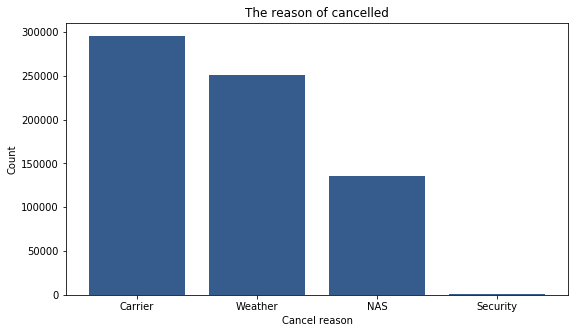

In [10]:
cancel_count = flight.groupby(['cancellation_code']).size().sort_values(ascending = False)[['Carrier', 'Weather', 'NAS', 'Security']]
color_base = color_base = sb.color_palette('viridis')[1]

plt.figure(figsize = (9, 5))
plt.bar(x = cancel_count.index, height = cancel_count.values, color = color_base)
plt.title('The reason of cancelled')
plt.xlabel('Cancel reason')
plt.ylabel('Count');

### Does the reason differ from month to month?
In Winter, weather is the main reason of flight cancellation while carrier is the main reason in other months.

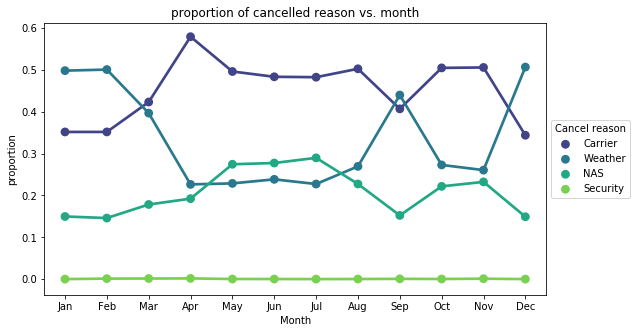

In [11]:
# cancel reason and time-based features
flight_cancel = flight.query('arrival_status == "Cancelled"')
    
x_count = flight_cancel.groupby(['month', 'cancellation_code']).size()
x_total = flight_cancel.groupby(['month']).size()
x_count = (x_count/x_total).reset_index(name = 'proportion')
    
plt.figure(figsize = (9, 5))
sb.pointplot(data = x_count, x = 'month', y = 'proportion', hue = 'cancellation_code', 
            hue_order = ['Carrier', 'Weather', 'NAS', 'Security'], palette = 'viridis')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Cancel reason')
x_tick = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
locs, labels = plt.xticks()
plt.xticks(locs, x_tick)
plt.xlabel('Month')
plt.ylabel('proportion');
plt.title('proportion of cancelled reason vs. month');

## Carrier vs. Delayed/Cancelled flights
There are 23 carriers in dataset. Order by flight number are WW, AA, DL, OO, MQ, UA, US, NW, XE, CO, OH, EW, FL, YV, AS, B6, 9E, DH, HP, F9, HA, TZ, and AQ.  
  
Let's see which carrier has more delay or cancellation, and how long is their mean delay time.

### Proportion of delayed and cancelled flights for each carrier
Flights have higher proportion of delayed flights is operated by EV, B6, AS, and AA, while HA and AQ have apparently lower proportion of delayed flights.  
  
Next up, let's look at cancellation of flights, actually every carriers have lower proportion of cancelled flights. Carrier MQ, YV, QH, EV, 9E, and DH have relatively higher proportion of cancellation among them.

In [12]:
# carrier and arrival status(delay and cancel). Order by carrier's total flights.
carrier_count = flight.groupby(['carrier', 'arrival_status']).size()
carrier_total = flight.groupby(['carrier']).size()
carrier_count = (carrier_count/carrier_total).reset_index(name = 'proportion')
carrier_order = flight.groupby(['carrier']).size().sort_values(ascending = False)

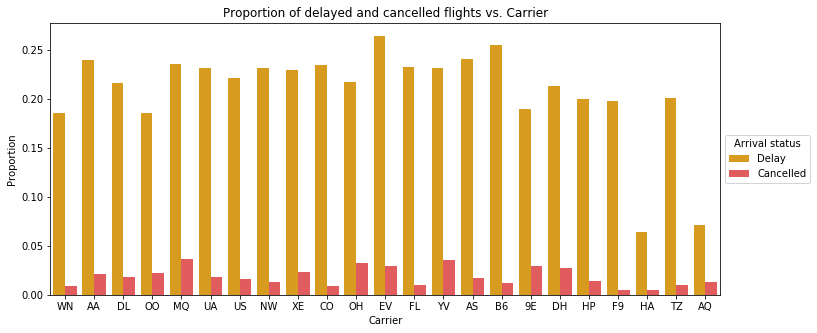

In [13]:
plt.figure(figsize = (12,5))
sb.barplot(data = carrier_count.query('arrival_status in ["Delay", "Cancelled"]'), x = 'carrier', y = 'proportion', hue = 'arrival_status',
           order = carrier_order.index, hue_order = ['Delay', 'Cancelled'], palette = {'Delay':'#F6A500', 'Cancelled':'#F7464A'})
plt.xlabel('Carrier')
plt.ylabel('Proportion')
plt.title('Proportion of delayed and cancelled flights vs. Carrier')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Arrival status');

### For each carrier, how long is their mean delay time?
No one wants to wait for flights for a long time. Let's take a overview of each carrier's mean delay time.  
  
YV is the arrier whose mean delay time above 60 minutes; AA, MQ, UA, XE, CO, EV, FL, B6, 9E, DH, and TZ are the arrier whose mean delay time is close to 60 minutes; HP, F9, and AQ are the carrier whose mean delay time is close to 40 minutes, and other carriers' mean delay time are around 50 minutes.

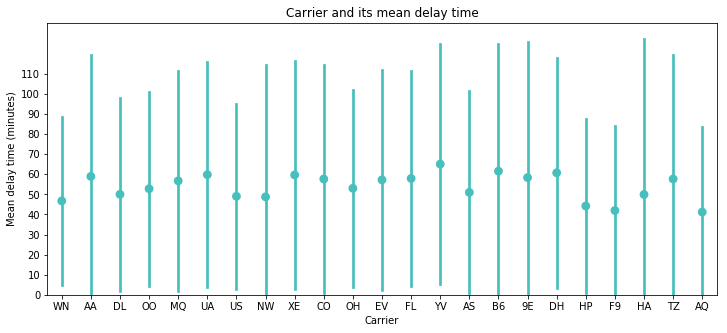

In [14]:
plt.figure(figsize = (12, 5))
sb.pointplot(data = flight.query('arrival_status == "Delay"'), x = 'carrier', y = 'arrdelay_time', color = "#46BFBD",
             order = carrier_order.index, linestyles = "", ci = 'sd')
plt.ylim(0,)
plt.yticks(np.arange(0, 120, 10), np.arange(0, 120, 10))
plt.title('Carrier and its mean delay time')
plt.xlabel('Carrier')
plt.ylabel('Mean delay time (minutes)');

## Destination vs. Delayed/Cancelled flights
*Which destination have more delayed or cancelled flights?* It is the problem people want to know. Now, Let's focus on top 10 destination and answer the question for you.  
  
Top 10 destination: ATL, ORD, DFW, LAX, DEN, IAH, PHX, LAS, EWR, DTW.

### Which destination have more delayed flights?
Top 3 are EWR, ORD, and ATL. EWR is located in the US state of New Jersey and is the fifteenth busiest airport in the US. ORD is the major airport in Chicago and it is the world's sixth-busiest airport. ATL is located in Atlanta and is the world's busiest airport.  
  
I ploted top 10 destination, all destinations are the bigger airport in the US.

In [15]:
delay_df = flight.query('arrival_status == "Delay"')
destination_count = flight.groupby(['destination']).size().sort_values(ascending = False)[:10]
dest_total = flight.groupby(['destination']).size()
dest_delay = delay_df.groupby('destination').size()
dest10_delay = (dest_delay/dest_total)[destination_count.index].sort_values(ascending = False).reset_index(name = 'proportion')

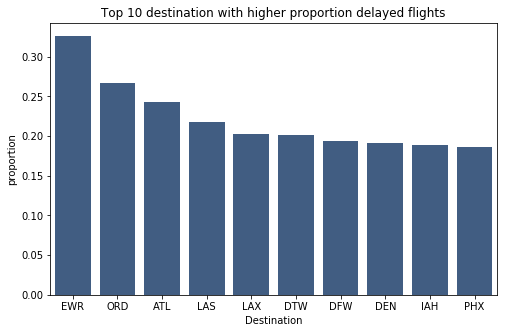

In [16]:
# Top 10 destination with great delayed flight
color_base = sb.color_palette('viridis')[1]
plt.figure(figsize = (8, 5))
sb.barplot(data = dest10_delay , x = 'destination', y = 'proportion', color = color_base);
plt.xlabel('Destination')
plt.title('Top 10 destination with higher proportion delayed flights');

### Which destination have more cancelled flights?
Cancelled flights actually occupy little proportion of all flights in every destinations. Top 3 destinations with great cancelled flights are ORD, EWR ,and DFW. ORD and EWR are also the destination that have larger proportion of delayed flights. 

In [17]:
cancel_df = flight.query('arrival_status == "Cancelled"')
dest_cancel = cancel_df.groupby('destination').size()
dest10_cancel = (dest_cancel/dest_total)[destination_count.index].sort_values(ascending = False).reset_index(name = 'proportion')

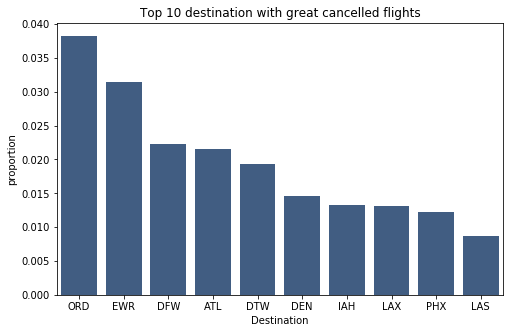

In [18]:
# Top 10 destination with great cancelled flight
color_base = sb.color_palette('viridis')[1]
plt.figure(figsize = (8, 5))
sb.barplot(data = dest10_cancel , x = 'destination', y = 'proportion', color = color_base);
plt.xlabel('Destination')
plt.title('Top 10 destination with great cancelled flights');

## Conclusion
It is not that often you will encounter delay or even cancellation of flights; the probability is about 23.8%. If your flight delay, delay time often within 100 minutes. But if you are so "lucky", you might wait for 200 minutes or incredible longer time. Flight delay usually caused by late aircraft, carrier, or NAS. Unfortunately, if your flight cancelled, it usually caused by carrier and weather. Weather reason usually happen in Winter, while carrier reason in other seasons.  
  
If your flight is operated by carrier EV and B6, it has a little higher probability to encounter delay. If the flight delay, you may not have to wait for a long time if your flight's carrier is HP, F9, or AQ.  
  
If your destination is one of the top 10 destinations that I've mentioned. You may have a litter higher probability encountering flight delay in EWR, ORD, and ATL. But do not too worry about encountering the cancellation that occupies few proportion.